In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
M = Base.classes.measurement
S = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(M.date)).first()
most_recent

('2017-08-23',)

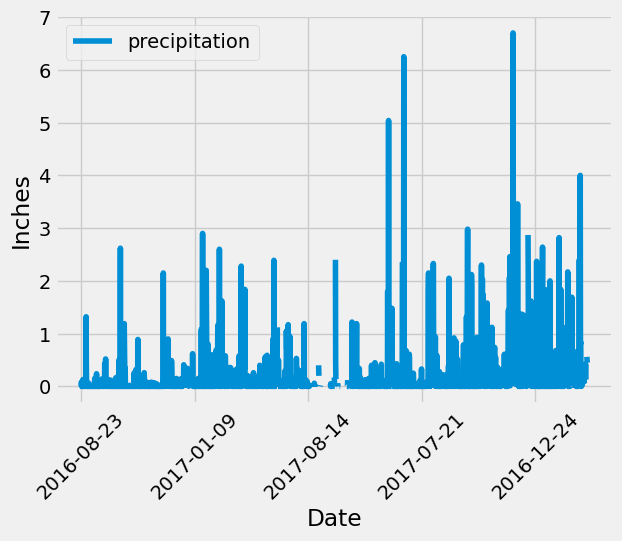

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(M.date,M.prcp).filter(M.date>= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results,columns = ['date','precipitation'])
# Sort the dataframe by date
df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date',y ='precipitation', rot=45)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(S.station)).all()

[(9,)]

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(M.station,func.count(M.station)).\
    group_by(M.station).order_by(func.count(M.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(M.tobs),func.max(M.tobs),func.avg(M.tobs)).\
    filter(M.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

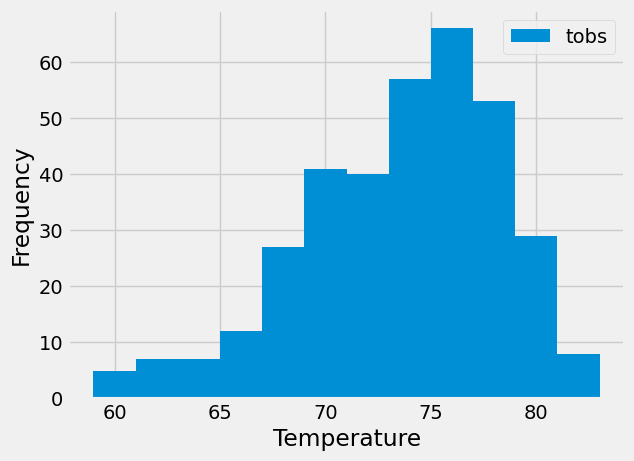

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results= session.query(M.tobs).\
    filter(M.station == 'USC00519281').\
    filter(M.date >= prev_year).all()

df = pd.DataFrame(results,columns = ['tobs'])
df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [36]:
# Close Session
session.close()